# Step 2 

In [1]:
# Import libraries

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import pulp

In [2]:
# Generating Points and Distances

n=5
random.seed(20246862)

def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2)*700)

In [3]:
def x_of(p):
    (x,_)=p
    return x
def y_of(p):
    (_, y)=p
    return y

In [4]:
P = []
eps = 0.05
while len(P)<n:
    i=len(P)
    x0=random.random()
    if x0<eps or x0>1-eps:
        continue
    y0=random.random()
    if y0<eps or y0>1-eps:
        continue
    P.append((x0,y0))
    for j in range(0,i):
        if dist(P[i],P[j])<50:
            P=P[:-1]
            break
town = [ chr(ord('A')+i) for i in range(0,n) ]

In [5]:
P

[(0.780677152841719, 0.24768935251489643),
 (0.6008167803559864, 0.41640173572058525),
 (0.7024583369166644, 0.828931302861875),
 (0.8134190736361858, 0.6661570238600951),
 (0.8909057397782246, 0.22244841870937337)]

In [6]:
town

['A', 'B', 'C', 'D', 'E']

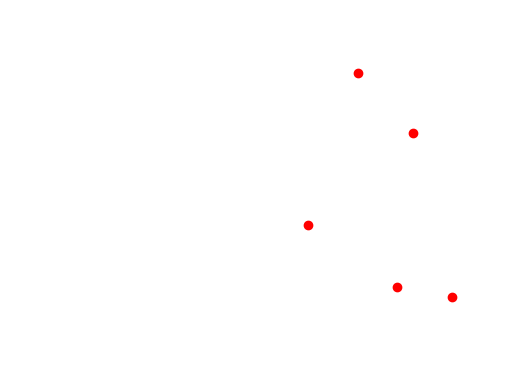

In [7]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('off')
plt.plot([ x for (x,_) in P ],[ y for (_,y) in P ], 'ro')

In [8]:
# Table of Distances

print("    ", end='')
for j in range(0, n):
    print(f"{town[j]:4s}", end='')
print()
for i in range(0, n):
    print(f"{town[i]:s}", end='')
    for j in range(0, n):
        if i==j:
            print(" ---", end='')
        else:
            print(f"{dist(P[i],P[j]):4d}", end='')
    print()

    A   B   C   D   E   
A --- 172 410 293  79
B 172 --- 297 229 244
C 410 297 --- 137 444
D 293 229 137 --- 315
E  79 244 444 315 ---


# Step 3

In [9]:
# Creating variables

x = pulp.LpVariable.dicts("x", ( range(0,n), range(0,n) ),
                          lowBound=0, upBound=1, 
                          cat=pulp.LpInteger)

In [10]:
x

{0: {0: x_0_0, 1: x_0_1, 2: x_0_2, 3: x_0_3, 4: x_0_4},
 1: {0: x_1_0, 1: x_1_1, 2: x_1_2, 3: x_1_3, 4: x_1_4},
 2: {0: x_2_0, 1: x_2_1, 2: x_2_2, 3: x_2_3, 4: x_2_4},
 3: {0: x_3_0, 1: x_3_1, 2: x_3_2, 3: x_3_3, 4: x_3_4},
 4: {0: x_4_0, 1: x_4_1, 2: x_4_2, 3: x_4_3, 4: x_4_4}}

In [11]:
# We need to keep track of the order in the tour to eliminate the possibility of subtours

u = pulp.LpVariable.dicts('u', (i for i in range(0,n)), lowBound=0, upBound=n, cat=pulp.LpInteger)

In [12]:
u

{0: u_0, 1: u_1, 2: u_2, 3: u_3, 4: u_4}

In [13]:
# Define Problem

problem = pulp.LpProblem("TSP",pulp.LpMinimize)

In [14]:
problem += pulp.lpSum([ dist(P[i],P[j])*x[i][j] 
                        for i in range(0,n)
                            for j in range(0,n)])

In [15]:
# Add Constraints (Encoding)
# Every Town is visited only once

for j in range(0,n):
    problem += pulp.lpSum([ x[i][j] 
                         for i in range(0,n) 
                             if i!=j
                       ]) ==1
constraints = n

In [16]:
# Every town was left only once:

for i in range(0,n):
    problem += pulp.lpSum([ x[i][j] 
                         for j in range(0,n)
                             if i!=j
                       ]) ==1
constraints += n

In [17]:
# Eliminate subtour
    
for i in range(0,n):
    for j in range(0,n):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n * (1 - x[i][j]) - 1
    constraints += n


In [18]:
print(f"{constraints:d} Constraints")

35 Constraints


In [19]:
# Check the encoding

problem

TSP:
MINIMIZE
172*x_0_1 + 410*x_0_2 + 293*x_0_3 + 79*x_0_4 + 172*x_1_0 + 297*x_1_2 + 229*x_1_3 + 244*x_1_4 + 410*x_2_0 + 297*x_2_1 + 137*x_2_3 + 444*x_2_4 + 293*x_3_0 + 229*x_3_1 + 137*x_3_2 + 315*x_3_4 + 79*x_4_0 + 244*x_4_1 + 444*x_4_2 + 315*x_4_3 + 0
SUBJECT TO
_C1: x_1_0 + x_2_0 + x_3_0 + x_4_0 = 1

_C2: x_0_1 + x_2_1 + x_3_1 + x_4_1 = 1

_C3: x_0_2 + x_1_2 + x_3_2 + x_4_2 = 1

_C4: x_0_3 + x_1_3 + x_2_3 + x_4_3 = 1

_C5: x_0_4 + x_1_4 + x_2_4 + x_3_4 = 1

_C6: x_0_1 + x_0_2 + x_0_3 + x_0_4 = 1

_C7: x_1_0 + x_1_2 + x_1_3 + x_1_4 = 1

_C8: x_2_0 + x_2_1 + x_2_3 + x_2_4 = 1

_C9: x_3_0 + x_3_1 + x_3_2 + x_3_4 = 1

_C10: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1

_C11: u_1 - u_2 + 5 x_1_2 <= 4

_C12: u_1 - u_3 + 5 x_1_3 <= 4

_C13: u_1 - u_4 + 5 x_1_4 <= 4

_C14: - u_1 + u_2 + 5 x_2_1 <= 4

_C15: u_2 - u_3 + 5 x_2_3 <= 4

_C16: u_2 - u_4 + 5 x_2_4 <= 4

_C17: - u_1 + u_3 + 5 x_3_1 <= 4

_C18: - u_2 + u_3 + 5 x_3_2 <= 4

_C19: u_3 - u_4 + 5 x_3_4 <= 4

_C20: - u_1 + u_4 + 5 x_4_1 <= 4

_C21: 

In [20]:
# Solve Problem and Display Solution

problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/hanisibr/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5t/7h86v1rd1sg2cp_m3c7mtv8r0000gn/T/963f57a93cb84668bebb15b7874b663e-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/5t/7h86v1rd1sg2cp_m3c7mtv8r0000gn/T/963f57a93cb84668bebb15b7874b663e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 27 COLUMNS
At line 172 RHS
At line 195 BOUNDS
At line 220 ENDATA
Problem MODEL has 22 rows, 24 columns and 76 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 789.8 - 0.00 seconds
Cgl0004I processed model has 22 rows, 24 columns (24 integer (20 of which binary)) and 76 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 6 integers unsatisfied sum - 2.4
Cbc0038I Pass   1: suminf.    1.60000 (8) obj. 919.4 it

1

In [21]:
# Plot the optimal route

def isElem(x, l):
    for i in range(0, len(l)):
        if l[i]==x:
            return True
    return False



In [22]:
def startpoint(trips):
    for i in range(0,n):
        for t in trips:
            if isElem(i, t):
                break
        else:
            return i

In [23]:
def totallength(trips):
    s=0
    for i in range(0, len(trips)):
        s += len(trips[i])-1
    return s

In [24]:
trips = []
while totallength(trips)<n:
    start = startpoint(trips)
    trip = [ start ]
    i = start
    while len(trip) < n-totallength(trips):
        for j in range(0, n):
            if pulp.value(x[i][j])==1:
                trip.append(j)
                i=j
                break        
        if pulp.value(x[trip[-1]][start])==1:
            trip.append(start)
            break
    trips.append(trip)
trips

[[0, 1, 2, 3, 4, 0]]

In [25]:
pulp.value(problem.objective)

1000.0

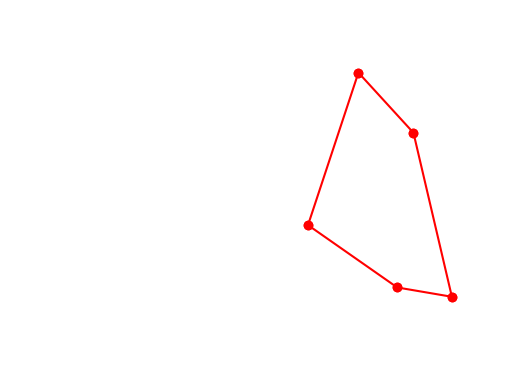

In [26]:
plt.xlim(0,1)
plt.ylim(0,1)
plt.axis('off')
for t in trips:
    for k in range(0,len(t)-1):
        plt.plot([ x_of(P[t[k]]), x_of(P[t[k+1]])], 
                 [ y_of(P[t[k]]), y_of(P[t[k+1]])], 'r-o')

## References:
## C. Horn (2023). Modelling, Simulation and Optimization: TSP
## Kaggle (2020) TSP PuLP Optimization / PyTorch Deep Learning. Available at:[https://www.kaggle.com/code/itoeiji/tsp-pulp-optimization-pytorch-deep-learning]